In [1]:
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

#import the User Datasets
xls = pd.ExcelFile('Device_Session_Duration.xlsx')

In [2]:
Desktop = pd.read_excel(xls, 'Desktop')
Mobile = pd.read_excel(xls, 'Mobile')
Tablet = pd.read_excel(xls, 'Tablet')

In [3]:
#Remove the dates for ease
Desktop = Desktop['Avg. Session Duration']
Mobile = Mobile['Avg. Session Duration']
Tablet = Tablet['Avg. Session Duration']

In [4]:
#convert datasets into arrays
Desktop = Desktop.values
Mobile = Mobile.values
Tablet = Tablet.values

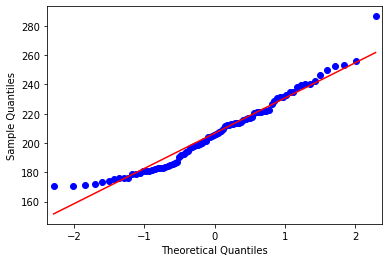

In [5]:
#plot both datasets using qqplot to check for normality
qqplot(Desktop, line='s')
pyplot.show()

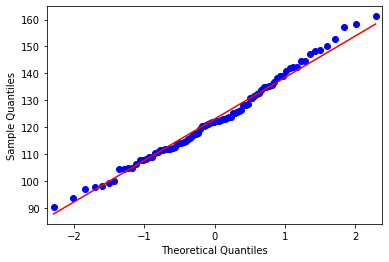

In [6]:
qqplot(Mobile, line='s')
pyplot.show()

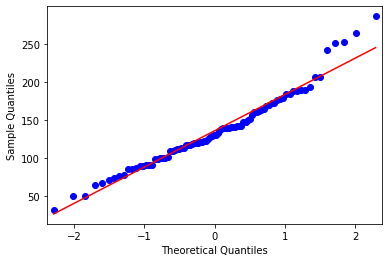

In [7]:
qqplot(Tablet, line='s')
pyplot.show()

### Not all datasets look normal

In [8]:
# normality test with Shapiro
stat, p = shapiro(Desktop)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.960, p=0.008
Sample does not look Gaussian (reject H0)


In [9]:
stat, p = shapiro(Mobile)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.985, p=0.392
Sample looks Gaussian (fail to reject H0)


In [10]:
stat, p = shapiro(Tablet)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.966, p=0.019
Sample does not look Gaussian (reject H0)


### Since not all datasets are normaly distributed non - parametric tests should be used.

In [11]:
#import ranksums (Wilcoxon-Mann-Whitney (WMW) rank sum test) to test wether the difference between the two datasets is significant
from scipy.stats import ranksums

In [12]:
stat, p = ranksums(Desktop,Mobile)
# interpret
alpha = 0.05
if p > alpha:
    print('The difference between the two datasets is not significant (fail to reject H0)')
else:
    print('The difference between the two datasets is significant (reject H0)')

The difference between the two datasets is significant (reject H0)


In [13]:
stat, p = ranksums(Desktop,Tablet)
# interpret
alpha = 0.05
if p > alpha:
    print('The difference between the two datasets is not significant (fail to reject H0)')
else:
    print('The difference between the two datasets is significant (reject H0)')

The difference between the two datasets is significant (reject H0)


In [14]:
stat, p = ranksums(Mobile,Tablet)
# interpret
alpha = 0.05
if p > alpha:
    print('The difference between the two datasets is not significant (fail to reject H0)')
else:
    print('The difference between the two datasets is significant (reject H0)')

The difference between the two datasets is not significant (fail to reject H0)
